### DSI Pandas Titanic Lab - Jared Delora-Ellefson

In [444]:
clear()

## Step 1: Reading the data

In [593]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [446]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data

1. Create a bar chart showing how many missing values are in each column

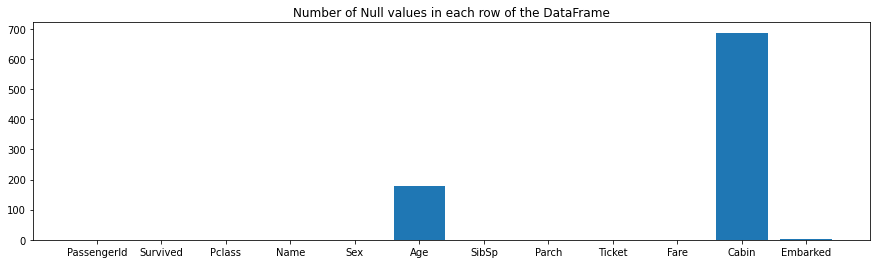

In [447]:
# A bar chart displaying how many null values in each column

plt.figure(figsize = (15, 4))

x_titles = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
y_values = [titanic_data[x].isnull().sum() for x in x_titles]
y_values
plt.bar(
        x_titles, # X Values
        y_values, data = titanic_data
        )
# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5



# No axes.

plt.title('Number of Null values in each row of the DataFrame');

2. Which column has the most `NaN` values? How many cells in that column are empty?

In [449]:
# Cabin has the most NaN values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3. Delete all rows where `Embarked` is empty

In [450]:
titanic_data.loc[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [451]:
titanic_data = titanic_data.drop(titanic_data.index[61])
titanic_data.loc[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [452]:
titanic_data = titanic_data.drop(titanic_data.index[828])
titanic_data.loc[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


4. Fill all empty cabins with **¯\\_(ツ)_/¯**

In [453]:
titanic_data["Cabin"].fillna("¯\(ツ)/¯", inplace = True)

In [454]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature extraction

1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [455]:
titanic_data['FamilyCount'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [456]:
# Create column that idetifies if a passanger is a Reverend
column_values = titanic_data['Name'].str.contains('Rev')
titanic_data['IsReverend'] = column_values

titanic_data["IsReverend"] = titanic_data["IsReverend"].astype(int) 


In [457]:
titanic_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [458]:
e_c = []
e_q = []
e_s = []
for item in titanic_data['Embarked']:
    if (item == 'C'):
        e_c.append(1)
        e_q.append(0)
        e_s.append(0)
    elif (item == 'Q'):
        e_c.append(0)
        e_q.append(1)
        e_s.append(0)
    elif (item == 'S'):
        e_c.append(0)
        e_q.append(0)
        e_s.append(1)

        
titanic_data['Embarked_C'] = e_c
titanic_data['Embarked_Q'] = e_q
titanic_data['Embarked_S'] = e_s

In [459]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


  - Do the same thing for `Sex`

In [460]:
e_m = []
e_f = []
for item in titanic_data['Sex']:
    if (item == 'male'):
        e_m.append(1)
        e_f.append(0)
    elif (item == 'female'):
        e_m.append(0)
        e_f.append(1)

titanic_data['male'] = e_m
titanic_data['female'] = e_f

In [462]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,male,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,1,0


## Step 4: Exploratory analysis 

1. What was the survival rate overall?

In [463]:
# 38% of the passengers survived
titanic_data['Survived'].mean()

0.38245219347581555

2. Which gender fared the worst? What was their survival rate?

In [464]:
# ~19% of men survived
titanic_data[(titanic_data['Sex'] == 'male')]['Survived'].mean()

0.18890814558058924

In [465]:
# ~74% of women survived
titanic_data[(titanic_data['Sex'] == 'female')]['Survived'].mean()

0.7403846153846154

3. What was the survival rate for each `Pclass`?

**Survival Rate of 1st Class:**

In [466]:
titanic_data[(titanic_data['Pclass'] == 1)]['Survived'].mean()

0.6261682242990654

**Survival Rate of 2nd Class:**

In [467]:
titanic_data[(titanic_data['Pclass'] == 2)]['Survived'].mean()

0.47282608695652173

**Survival Rate of 3rd Class:**

In [468]:
titanic_data[(titanic_data['Pclass'] == 3)]['Survived'].mean()

0.24236252545824846

**Survival Rate of Men for the 3 Classes:**

In [469]:
titanic_data[(titanic_data['Pclass'] == 1) & (titanic_data['Sex'] == 'male')]['Survived'].mean()

0.36885245901639346

In [470]:
titanic_data[(titanic_data['Pclass'] == 2) & (titanic_data['Sex'] == 'male')]['Survived'].mean()

0.1574074074074074

In [471]:
titanic_data[(titanic_data['Pclass'] == 3) & (titanic_data['Sex'] == 'male')]['Survived'].mean()

0.13544668587896252

4. Did any reverends survive? How many?

In [472]:
# None of the Reverends survived
titanic_data[(titanic_data['IsReverend'] == 1) & (titanic_data['Survived'] == 0)]['Survived']

149    0
150    0
249    0
626    0
848    0
886    0
Name: Survived, dtype: int64

5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [488]:
# ~About 30% of people in "¯\(ツ)/¯" survived
titanic_data[(titanic_data['Cabin'] == "¯\(ツ)/¯")]['Survived'].mean()

0.29985443959243085

6. What is the survival rate for people whose `Age` is empty?

In [491]:
titanic_data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [510]:
# 30% of passangers with unknown age survived
titanic_data[titanic_data["Age"].isna() == True]['Survived'].mean()

0.2937853107344633

7. What is the survival rate for each port of embarkation?

In [511]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,male,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,1,0


In [522]:
# ~55% of passengers originating at Port C survived
titanic_data[(titanic_data['Embarked_C'] == True)]['Survived'].mean()

0.5535714285714286

In [536]:
# ~38% of passengers originating at Port Q survived
titanic_data[(titanic_data['Embarked_Q'] == True)]['Survived'].mean()

0.38961038961038963

In [529]:
# ~34% of passengers originating at Port s survived
titanic_data[(titanic_data['Embarked_S'] == True)]['Survived'].mean()

0.33695652173913043

8. What is the survival rate for children (under 12) in each `Pclass`?

In [554]:
# ~75% of children under 12 In 1st Class survived
titanic_data[(titanic_data['Age'] < 12) & (titanic_data['Pclass'] == 1)]['Survived'].mean()

0.75

In [558]:
# 100% of children under 12 1n 2nd Class survived
titanic_data[(titanic_data['Age'] < 12) & (titanic_data['Pclass'] == 2)]['Survived'].mean()

1.0

In [559]:
# 40% of children under 12 1n 3nd Class survived
titanic_data[(titanic_data['Age'] < 12) & (titanic_data['Pclass'] == 3)]['Survived'].mean()

0.40425531914893614

9. Did the captain of the ship survive? Is he on the list?

In [567]:
# The captain is on the list. He did not survive.
titanic_data[titanic_data['Name'].str.contains('Cap')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,male,female
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,1,0


10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [572]:
# Some poor soul paid $263 for their ticket
titanic_data[(titanic_data['Survived'] == False)]['Fare'].max()

263.0

11. Does having family on the boat help or hurt your chances of survival?

In [576]:
# People with family survived more often than those who were alone, 50% to 30%
titanic_data[(titanic_data['FamilyCount'] > 0)]['Survived'].mean()

0.5056497175141242

In [577]:
titanic_data[(titanic_data['FamilyCount'] == 0)]['Survived'].mean()

0.30093457943925234

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

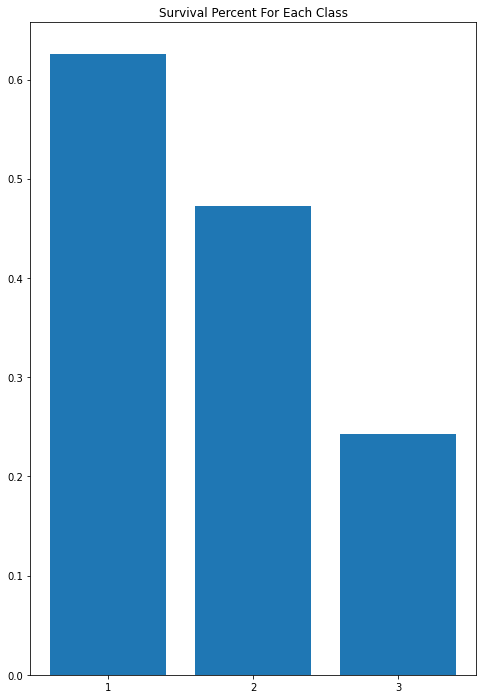

In [604]:
# Bar graph of Survival Percent For Each Class
df = titanic_data
plt.figure(figsize = (8, 12))
y_values = [df[df['Pclass'] == 1]['Survived'].mean(), df[df['Pclass'] == 2]['Survived'].mean(), df[df['Pclass'] == 3]['Survived'].mean()]
plt.bar(
    ['1', '2', '3'],
    y_values
      )

# Add a title and show the plot.
plt.title('Survival Percent For Each Class');

Text(0, 0.5, 'Fare')

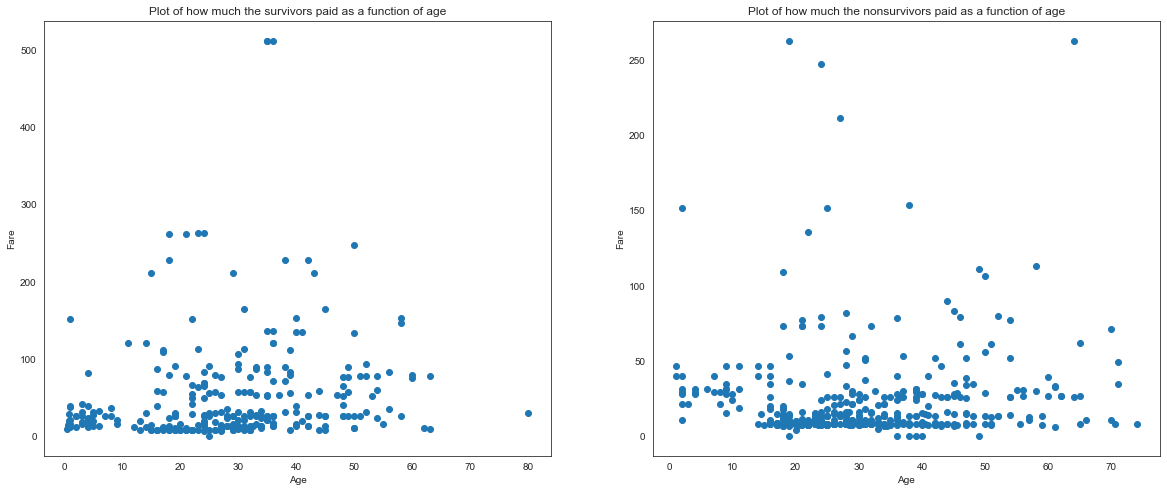

In [649]:
# Plot of how much the survivors paid as a function of age
df = titanic_data

fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].set_title('Plot of how much the survivors paid as a function of age')
ax[1].set_title('Plot of how much the nonsurvivors paid as a function of age')

plot1_xvalue = df[df['Survived'] == True]['Age']
plot1_yvalue1 = df[df['Survived'] == True]['Fare']
#plot1_yvalue2 = 'sat_2017_reading_writing'



ax[0].scatter(plot1_xvalue,
            plot1_yvalue1)
#ax[0].set_xlim([0, 80])
# ax[0].scatter(df[plot1_yvalue2],
#             df[plot1_xvalue]);
# ax[0].set_xlim([400, 800]);
xlabel = 'Age'
ax[0].set_xlabel(xlabel)
ylabel = 'Fare'
ax[0].set_ylabel(ylabel)

plot2_xvalue = df[df['Survived'] == False]['Age']
plot2_yvalue1 = df[df['Survived'] == False]['Fare']
# plot2_yvalue2 = 'sat_2018_reading_writing'

ax[1].scatter(plot2_xvalue,
            plot2_yvalue1)
# ax[1].set_xlim([400, 800])
# ax[1].scatter(test_data[plot2_yvalue2],
#             df[plot2_xvalue]);
# ax[1].set_xlim([400, 800]);
xlabel = 'Age'
ax[1].set_xlabel(xlabel)
ylabel = 'Fare'
ax[1].set_ylabel(ylabel)



In [627]:
import seaborn as sns

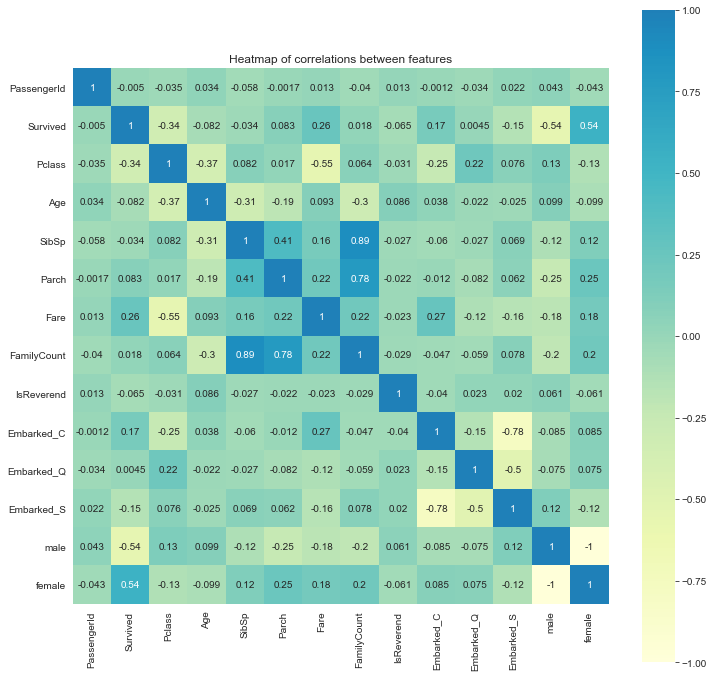

In [629]:
# Heat Map of our DataFrame
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,12))
# plt.figure(figsize=(8, 5))
sns.heatmap(titanic_data.corr(), annot=True, square =True ,
annot_kws={"size": 10} ,center= .5,cmap="YlGnBu"
            ).set_title('Heatmap of correlations between features');

In [651]:
2 == True

False